# Visualizacion de datos
## Dataset Marketing

<img src=https://www.tuexperto.com/wp-content/uploads/2021/12/20-imagenes-navidenas-para-felicitar-la-llegada-de-la-navidad.jpg>

In [1]:
## Importancion de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as date

In [2]:
## Llamar a los documentos que se deben analizar 

path = r"C:\Users\ViG\Desktop\Materiales curso Visualización de Datos con Python"


In [3]:
##Para llamar las subrutas se deben mantener unicamamente el nombre de los documentos

list_orders = pd.read_csv(path+ "\List of Orders.csv")##,sep=';', header=0,index_col=False,
                        ## encoding='latin-1',engine='python')

order_details = pd.read_csv(path+ "\Order Details.csv") ##,sep=';', header=0,index_col=False,
                        ## encoding='latin-1',engine='python')

In [4]:
## visualizar la lista del dataset de list_orders
list_orders.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,1/4/2018,Bharat,Gujarat,Ahmedabad
1,B-25602,1/4/2018,Pearl,Maharashtra,Pune
2,B-25603,3/4/2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,3/4/2018,Divsha,Rajasthan,Jaipur
4,B-25605,5/4/2018,Kasheen,West Bengal,Kolkata


In [5]:
## visualizar la lista del dataset de Order Details, se debe de llamar con minuscula y con separador de guion bajo
order_details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275,-1148,7,Furniture,Bookcases
1,B-25601,66,-12,5,Clothing,Stole
2,B-25601,8,-2,3,Clothing,Hankerchief
3,B-25601,80,-56,4,Electronics,Electronic Games
4,B-25602,168,-111,2,Electronics,Phones


## Transformacion de datos

In [6]:
## Tranformacion de datos fechas(Formato text a formato fecha) Formato en Ingles puede dar problemas

list_orders['Order Date'] = pd.to_datetime(list_orders['Order Date'], format="%d/%m/%Y")


In [7]:
## Union de bases

df = pd.merge(order_details, list_orders,
             left_on = 'Order ID',
             right_on = 'Order ID')

In [8]:
## Crear columnas de Mes y Año , con el head se revisa como esta quedando el nuevo dataframe

df['Mes'] = df['Order Date'].dt.month
df['Anio'] = df['Order Date'].dt.year
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City,Mes,Anio
0,B-25601,1275,-1148,7,Furniture,Bookcases,2018-04-01,Bharat,Gujarat,Ahmedabad,4,2018
1,B-25601,66,-12,5,Clothing,Stole,2018-04-01,Bharat,Gujarat,Ahmedabad,4,2018
2,B-25601,8,-2,3,Clothing,Hankerchief,2018-04-01,Bharat,Gujarat,Ahmedabad,4,2018
3,B-25601,80,-56,4,Electronics,Electronic Games,2018-04-01,Bharat,Gujarat,Ahmedabad,4,2018
4,B-25602,168,-111,2,Electronics,Phones,2018-04-01,Pearl,Maharashtra,Pune,4,2018


In [9]:
## Crear agrupacion de datos por mes y sus ventas

df_mes = pd.DataFrame(df.groupby(['Mes'])[['Amount','Quantity']].sum()).reset_index()
df_mes.head()

,Mes,Amount,Quantity
0,1,61439,745
1,2,38424,512
2,3,58937,751
3,4,32726,389
4,5,28545,423


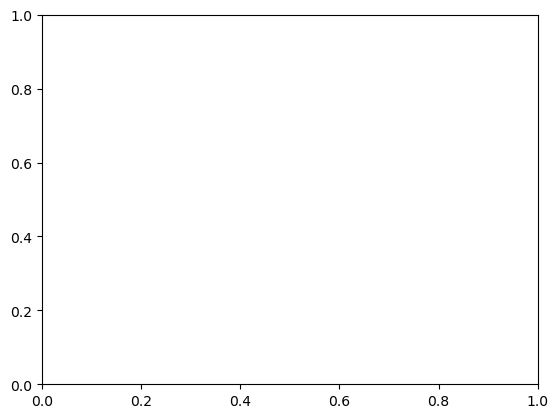

In [10]:
## Creacion de la carcaza para la creacion de los objetos visualez, aplicando matplotlib.pyplot creando y tupla
## fig se usa para guardar la imagen, es todo lo que se vera en el grafico

fig, ax = plt.subplots()
plt.show()


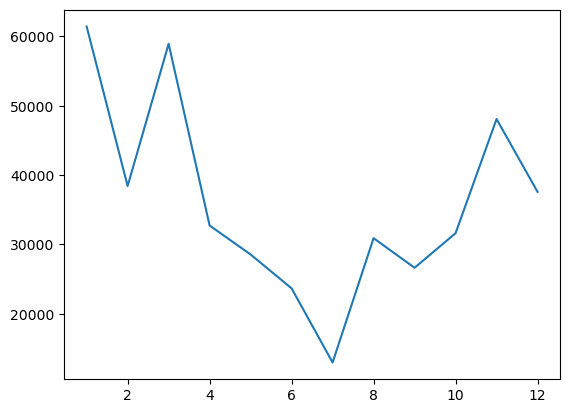

In [11]:
## Creacion grafico y llamar a fig 
fig, ax = plt.subplots()
ax.plot(df_mes['Mes'], df_mes['Amount'])
plt.show()

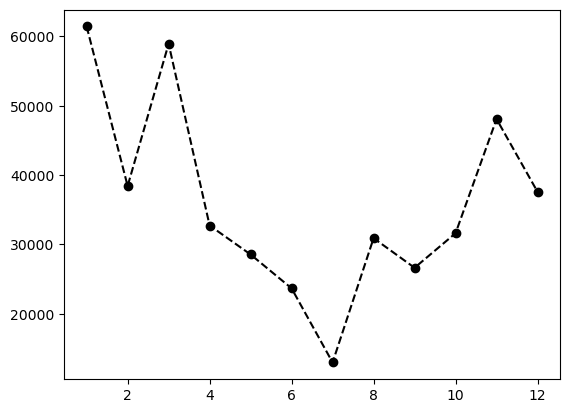

In [12]:
## Grafico de lineas y sus propiedades
## Se define el grafico
## Para buscar mas detalles de los graficos se puede verificar la pagina de matplotlit

fig, ax = plt.subplots()
ax.plot(df_mes['Mes'], df_mes['Amount'],
       marker = 'o', linestyle ='--', color = 'black')
plt.show()

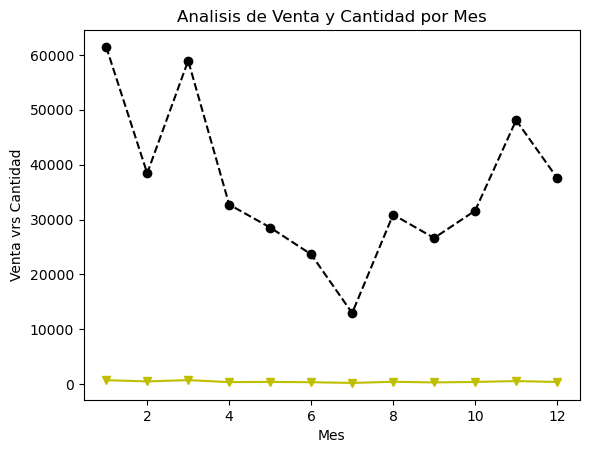

In [13]:
## Grafico de lineas con mas caractericas trabajando dos tendencias

fig, ax = plt.subplots()
ax.plot(df_mes['Mes'], df_mes['Amount'],
       marker = 'o', linestyle ='--', color = 'black')
ax.plot(df_mes['Mes'], df_mes['Quantity'],
       marker = 'v',  color = 'y')
ax.set_xlabel('Mes') # Nombre dek eje x
ax.set_ylabel('Venta vrs Cantidad') # Nombre del eje y
ax.set_title ('Analisis de Venta y Cantidad por Mes') ## Nombre del titulo
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

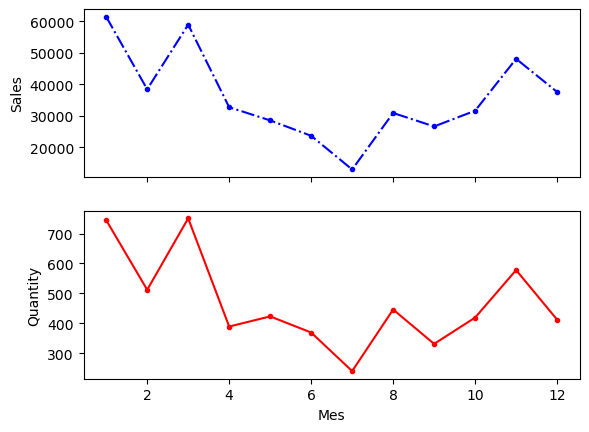

In [14]:
## Trabajar con dos graficos a la vez, siempre debe de llamarse la carcaza con fig

## Primer argumento filas y luego las columnas
## el order de los parentesis cuadrados es [0,1]

## sharex o sharey = True nos indica que los ejes sean iguales o compartidos

fig, ax = plt.subplots(2,1, sharex = True) ## cuantas carcazas se mostraran

ax[0].plot(df_mes['Mes'], df_mes['Amount'],
          marker = '.', linestyle = '-.', color ='b')
ax[1].plot(df_mes['Mes'], df_mes['Quantity'],
          marker = '.', linestyle = None, color ='r')
## Personalizar las etiquetas
ax[0].set_ylabel('Sales')
ax[1].set_ylabel('Quantity')
ax[1].set_xlabel('Mes')
plt.show

In [15]:
def mult(x):
    x*=1
    return value *2

In [16]:
value = 10
value =mult(value)
print(value)

20


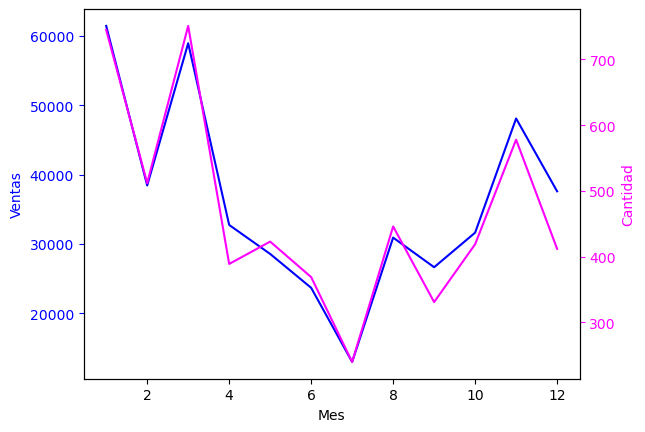

In [17]:
## Graficos de tendencia con escalas diferentes, dos escalas en un solo grafico

fig, ax = plt.subplots()
ax.plot(df_mes['Mes'], df_mes ['Amount'], color ='blue')
ax.set_xlabel('Mes')
ax.set_ylabel('Ventas', color = 'blue')
ax.tick_params('y',colors = 'blue')
ax2 = ax.twinx()
ax2.plot(df_mes['Mes'], df_mes ['Quantity'], color ='magenta')
ax2.set_ylabel('Cantidad', color = 'magenta')
ax2.tick_params('y',colors = 'magenta')
##ax.invert_yaxis() para invertir los ejes
##ax.set_ylim(0,7000) Parametro de escala
plt.show()

In [18]:
## Agrupacion de categoria-venta-cantidad
df_categoria = pd.DataFrame(df.groupby(['Category']) [['Amount','Quantity']].sum())
df_categoria.head()

,Amount,Quantity
Category,,
Clothing,139054,3516
Electronics,165267,1154
Furniture,127181,945


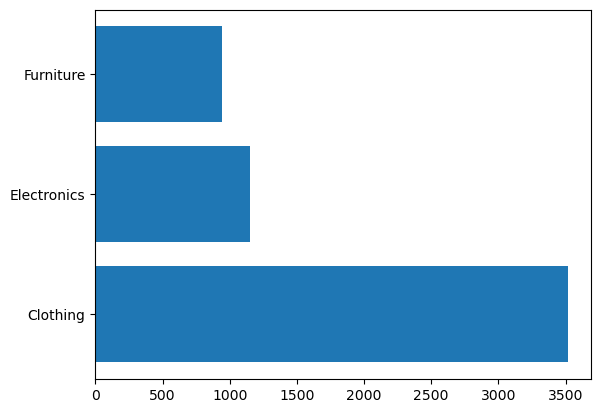

In [19]:
## Graficos de barras horizontales

fig, ax =plt.subplots()
ax.barh(df_categoria.index, df_categoria['Quantity'])
plt.show()



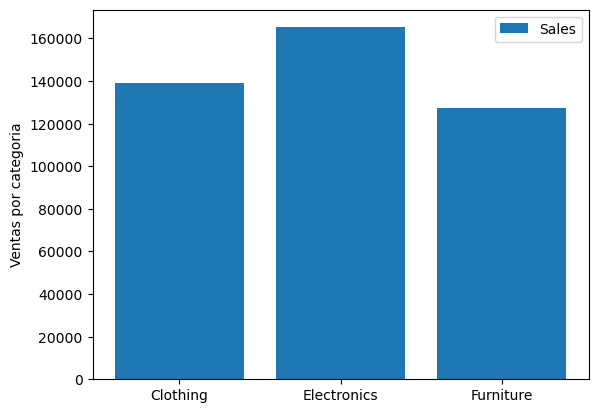

In [20]:
## Graficos de columnas o verticales

fig, ax = plt.subplots()
ax.bar(df_categoria.index, df_categoria['Amount'], label = 'Sales')
ax.legend()
ax.set_ylabel('Ventas por categoria')
plt.show()

## Agregar la leyenda
## Agregar etiqueta

C:\Users\ViG\AppData\Local\Temp\ipykernel_2240\168550660.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_categoria.index, rotation = 45)


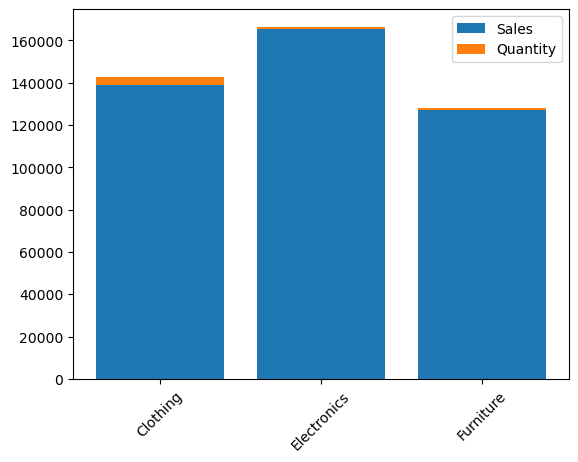

In [21]:
## Grafico barras apiliadas guardar como imagen

fig, ax = plt.subplots()

ax.bar(df_categoria.index, df_categoria['Amount'], label = 'Sales')
ax.bar(df_categoria.index, df_categoria['Quantity'],
      bottom = df_categoria['Amount'], label = 'Quantity')
ax.legend()
ax.set_xticklabels(df_categoria.index, rotation = 45)
fig.savefig('grafico_bar1.png', dpi =200)
plt.show()

C:\Users\ViG\AppData\Local\Temp\ipykernel_2240\1699465308.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_categoria.index, rotation = 45)


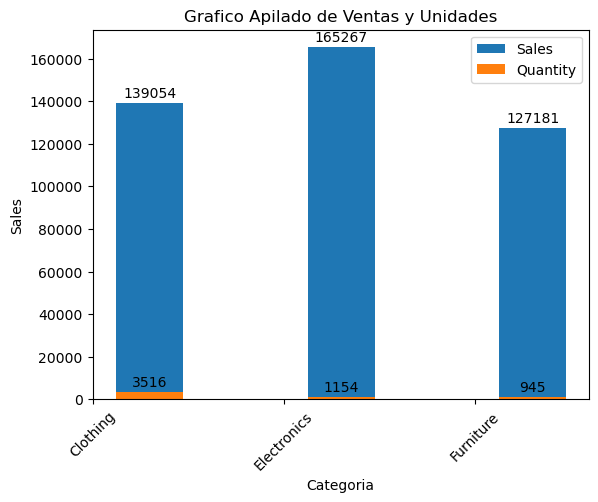

In [22]:
## Grafico de barras con anotaciones (Caracteristicas espeficias)

width = 0.35
fig, ax = plt.subplots()

x = np.arange(len(df_categoria.index))

rects1 = ax.bar(df_categoria.index, df_categoria['Amount'], width, label ='Sales')
rects2 = ax.bar(df_categoria.index, df_categoria['Quantity'], width, label ='Quantity')

ax.set_title('Grafico Apilado de Ventas y Unidades')
ax.set_xlabel('Categoria')
ax.set_ylabel('Sales')
ax.legend()
ax.set_xticklabels(df_categoria.index, rotation = 45)
ax.set_xticks(x - 0.3)

## Funcion barra por barra para mostrar montos correspondientes

def autolabel(rects):
    """ Funcion agregar una etiqueta con el valor de cada barra""" 
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy = (rect.get_x() + rect.get_width() / 2, height),
                   xytext =(0,2),
                   textcoords ='offset points' , 
                   ha = 'center' ,  va ='bottom')
        
## Añadir etiquetas para cada barra

autolabel(rects1)
autolabel(rects2)
plt.show()

In [23]:
## Segmentar dataset en  años

df_fecha = pd.DataFrame(df.groupby(['Order Date', 'Anio'])[['Amount', 'Quantity']].sum()).reset_index()

per_19 = df_fecha[df_fecha['Anio'] ==2019]
per_18 = df_fecha[df_fecha['Anio'] ==2018]

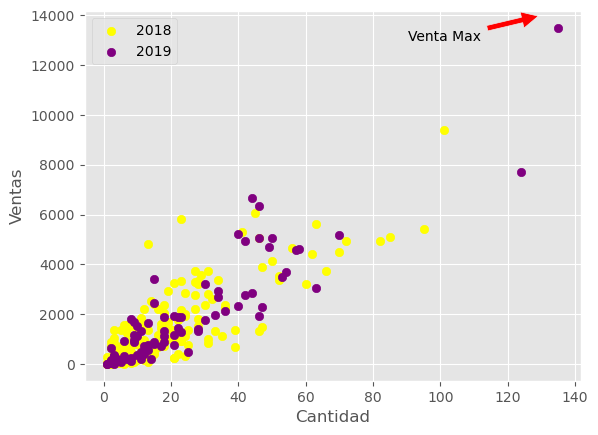

In [24]:
## Grafico de dispercion

## GRaficos stilos RStudio
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots()
ax.scatter(per_18['Quantity'],per_18['Amount'],
          color ='yellow', label = '2018')
ax.scatter(per_19['Quantity'],per_19['Amount'],
          color ='purple', label = '2019') ## graficar ambas lineas
ax.annotate('Venta Max', xy = (130, 14000),xycoords = 'data',
           xytext = (0.8,0.95), textcoords = 'axes fraction',
           arrowprops=dict(facecolor='red', shrink=0.05),
          horizontalalignment = 'right', verticalalignment = 'top' ) 
ax.set_xlabel('Cantidad')
ax.set_ylabel('Ventas')
ax.legend()
plt.show()

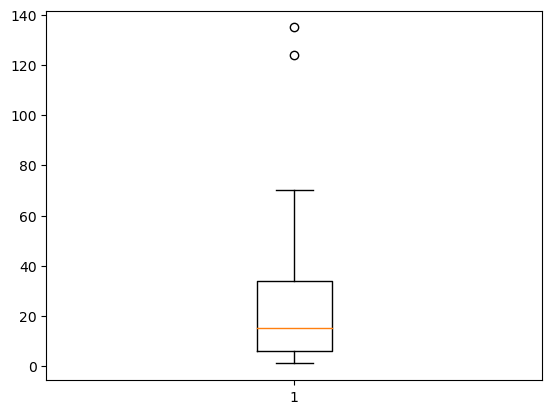

In [25]:
## Boxplot

plt.style.use('default')

fig, ax = plt.subplots()

ax.boxplot(per_19['Quantity'])

plt.show()

## Nuevo Datasets de Video_Games y Pokemon

In [29]:
## Visualizacion Estadistica 

path= r"C:\Users\ViG\Desktop\Materiales curso Visualización de Datos con Python\Video_Games.csv"

Video_Games = pd.read_csv(path,sep=';', header=0,index_col=False,encoding='latin-1',
                          engine='python')
path1= r"C:\Users\ViG\Desktop\Materiales curso Visualización de Datos con Python\Pokemon.csv"

Pokemon = pd.read_csv(path1,sep=';', header=0,index_col=False,encoding='latin-1',
                          engine='python')

In [30]:
## Explorar el set de datos

# Video_Games

Video_Games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
##Pokemon

Pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


<Axes: xlabel='Critic_Score', ylabel='Count'>

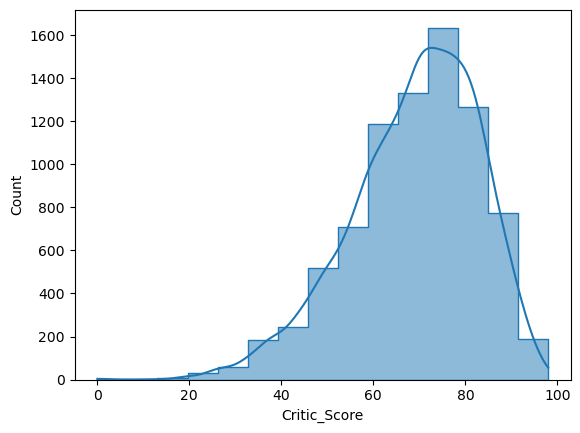

In [39]:
## Distribuciones

# Grafico Histogramas

sns.histplot(Video_Games['Critic_Score'], kde= True, bins = 15, fill= True, element ='step')

C:\Users\ViG\AppData\Local\Temp\ipykernel_2240\3660223854.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Video_Games['Critic_Score'])


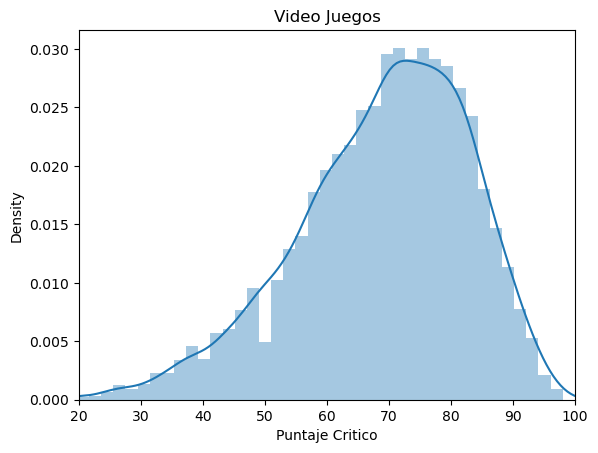

In [41]:
## Graficos de densidad

fig, ax = plt.subplots()

sns.distplot(Video_Games['Critic_Score'])
ax.set(xlabel = 'Puntaje Critico',
      xlim = (20,100),
       title ='Video Juegos')
plt.show()

C:\Users\ViG\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


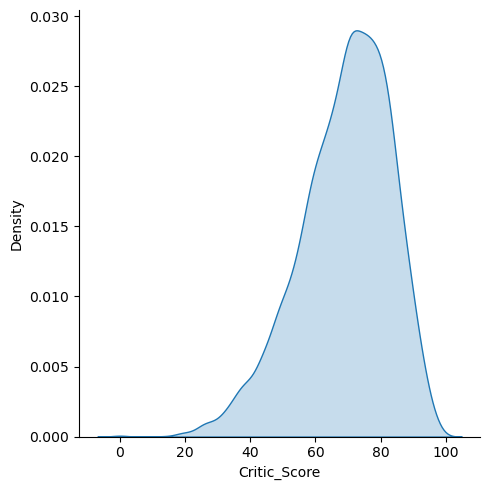

In [43]:
## Grafico displot

sns.displot(data = Video_Games['Critic_Score'], kind = 'kde', fill = True)
plt.show()

<Axes: xlabel='Type 1', ylabel='Total'>

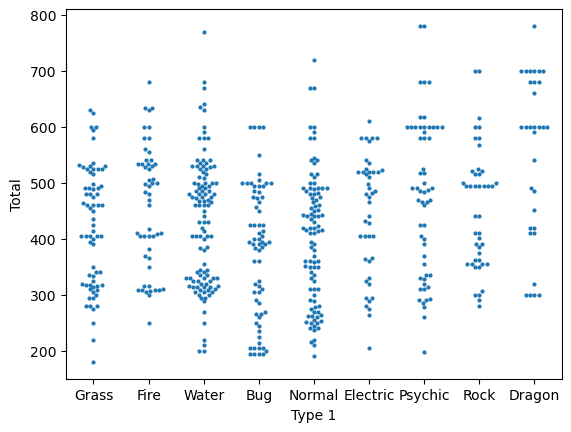

In [46]:
## Graficos emjambre o swarplot, comparacion entre las varaibles

sns.swarmplot( data = Pokemon,
             x ='Type 1',
             y ='Total',
             s = 3)

<Axes: xlabel='Type 1', ylabel='Total'>

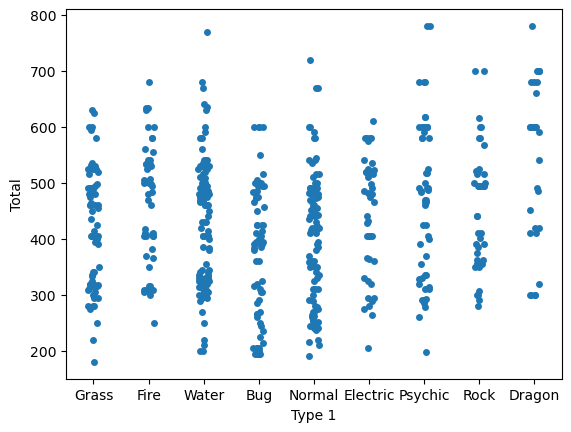

In [51]:
## Graficos de bandas o stripplot

sns.stripplot(data = Pokemon,
             x ='Type 1',
             y ='Total',
            jitter = True ## separar valores
            )

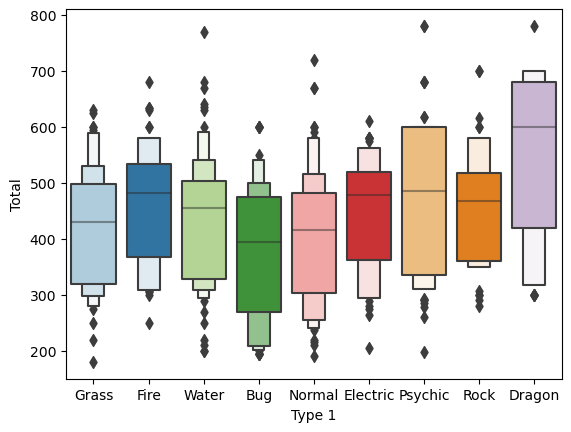

In [52]:
## Lvplot o boxenplot (analizar valores atipicos)

sns.boxenplot(data = Pokemon,
             x ='Type 1',
             y = 'Total',
             palette = 'Paired')
plt.show()

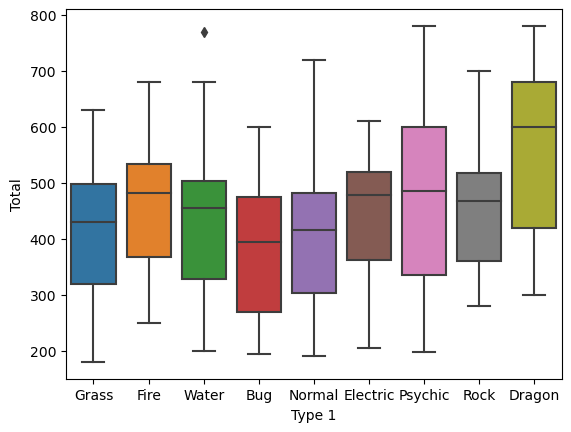

<Figure size 640x480 with 0 Axes>

In [54]:
## Boxplot

sns.boxplot(data = Pokemon,
           x='Type 1',
           y= 'Total')

plt.show()
plt.clf()## calidad figura

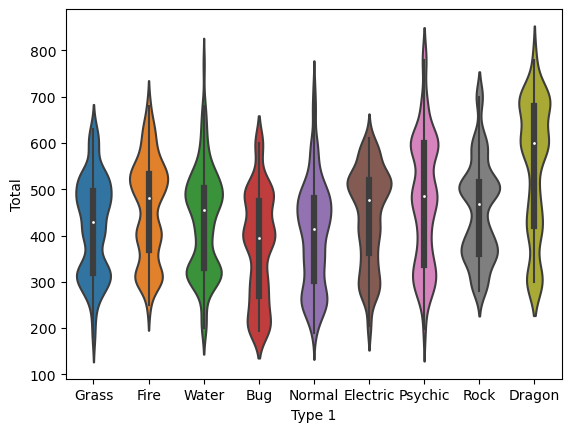

<Figure size 640x480 with 0 Axes>

In [56]:
## Grafico de Violin , mustra la union del boxplot con grafico de densidad

sns.violinplot(data = Pokemon,
              x= 'Type 1',
              y='Total',
              bw = 0.25) ## modificar la intensidad del ancho de banda
plt.show()
plt.clf()## calidad figura